# Logistic Regression

- Regression is finding relationship with independent variables and dependent variable.
- It deal with Categorical data


Two types of problem:

1. Regression 
    - Continuous Data
    - One output
2. Classification
    - Categorical Data
    - More than two
        - cat, dog, snake
        - Apple, banana, grape

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings

warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('data/train.csv')

## Predict the number of people those survived in the Titanic Catastrophe

In [29]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data = data.drop(['Name','Ticket','Cabin'], axis=1)

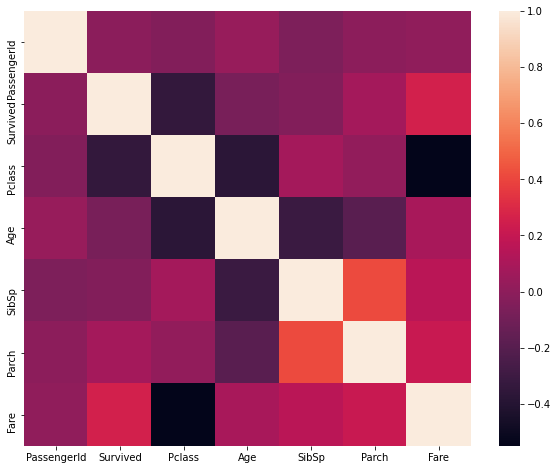

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

## Pair Plot

It gives an overview of the sample.

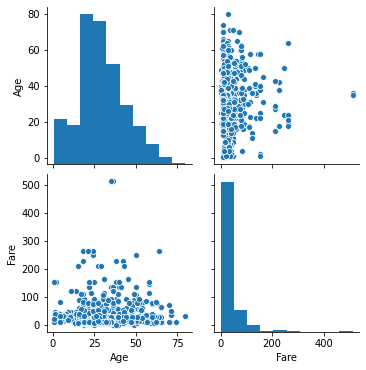

In [32]:
sns.pairplot(data[['Age', 'Fare']])

## Violin Plot

- When visualising Categories 
- It shows the density of each category with respect to the feature it is compared against.

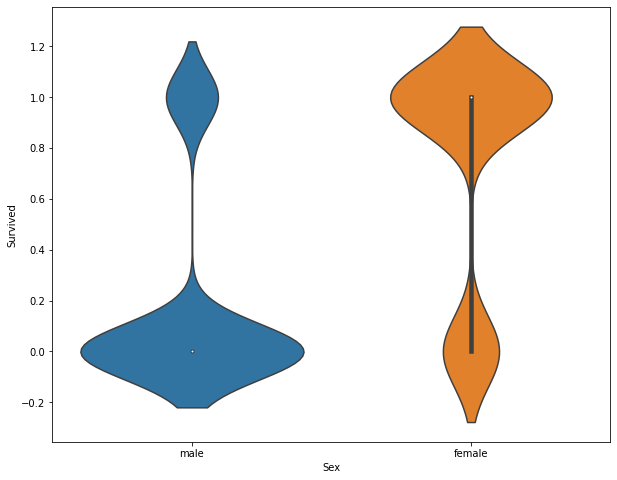

In [33]:
plt.figure(figsize=(10,8))
sns.violinplot(data.Sex, data.Survived)

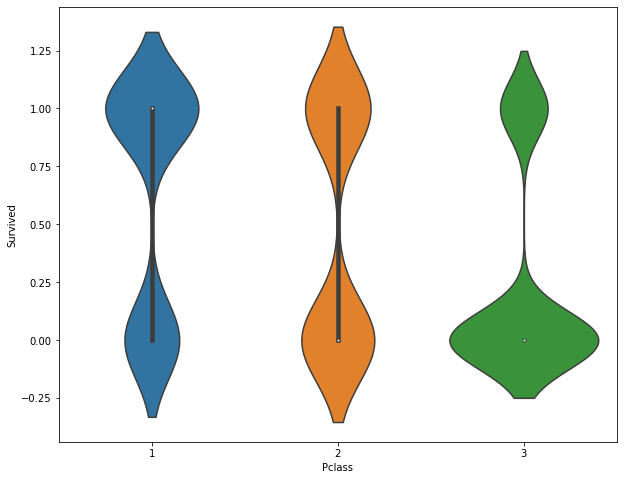

In [34]:
plt.figure(figsize=(10,8))
sns.violinplot(data.Pclass, data.Survived)

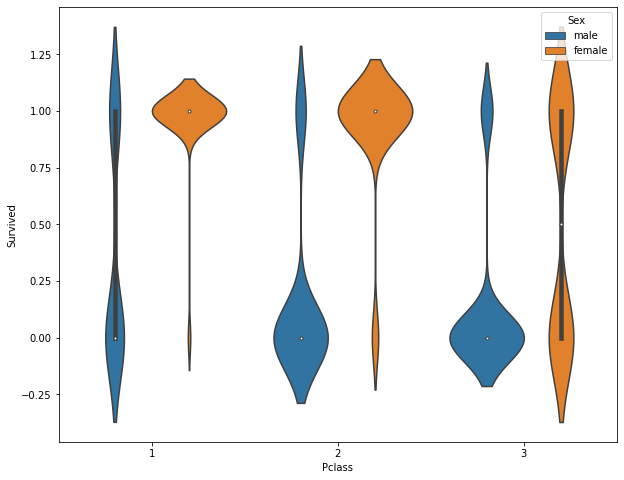

In [35]:
plt.figure(figsize=(10,8))
sns.violinplot(data.Pclass, data.Survived, hue=data.Sex)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [37]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [38]:
data.Age = data.Age.fillna(data.Age.median())

In [39]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [40]:
data.Embarked.fillna('Q')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [46]:
col = ['a', 'b', 'c',np.nan, 'b', 'c','a', np.nan, 'c','a', 'b', 'c','q','r','t']

In [48]:
d = pd.DataFrame({'feature1':col})

In [49]:
d.head()

,feature1
0,a
1,b
2,c
3,NaN
4,b


In [50]:
d.feature1.fillna(d.feature1.mean())

TypeError: can only concatenate str (not "int") to str

In [52]:
col

['a', 'b', 'c', nan, 'b', 'c', 'a', nan, 'c', 'a', 'b', 'c', 'q', 'r', 't']

In [55]:
d.feature1 = pd.Categorical(d.feature1,['a','b','c','q','r','t']).codes

In [56]:
d.feature1 = d.feature1.replace(-1, np.nan)

In [60]:
d.feature1.fillna(int(d.feature1.mean()))

0     0.0
1     1.0
2     2.0
3     1.0
4     1.0
5     2.0
6     0.0
7     1.0
8     2.0
9     0.0
10    1.0
11    2.0
12    3.0
13    4.0
14    5.0
Name: feature1, dtype: float64

In [41]:
for i in data.Embarked.unique():
    print(i)

S
C
Q
nan


### pd.Categorical converts the nan values to -1

In [43]:
data.Embarked = pd.Categorical(data.Embarked, ['S','C','Q']).codes

In [44]:
data.Embarked.unique()


array([ 0,  1,  2, -1], dtype=int8)

In [45]:
data.Embarked = data.Embarked.replace(-1, np.nan)

In [69]:
data.Embarked = data.Embarked.fillna(data.Embarked.mean())

## DrawBack of LabelEncoder

- It cannot handle missing values or nan.

In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data.Sex = encoder.fit_transform(data.Sex)

In [71]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = data.drop('Survived', 1) #independent variable
y = data.Survived #dependent variable

## Spliting the data

1. Data
2. $X$ and $y$, which is Independent variable and dependent variable. Question and answer.
3. Training and testing dataset:
    - X_train and y_train => 70 
        - Training => find the missing parameters
        - Missing parameters are weights $w$ and bias $b$, Slope and y-intercept
        - These missing parameters is what derives the relationship between $X$ and $y$, which is Independent variable and dependent variable respectively.
    - X_test and y_teas => 30
        - Evaluate your findings

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8022388059701493

In [46]:
b = model.intercept_[0]

In [47]:
w = model.coef_[0][0]

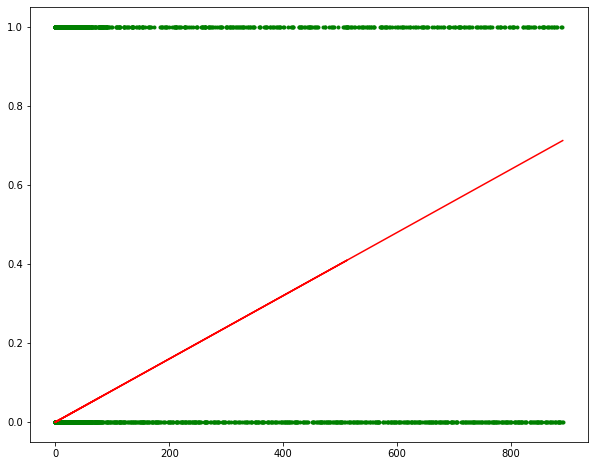

In [48]:
plt.figure(figsize=(10,8))
plt.plot(X,y, 'g.')
plt.plot(X,X*w, 'r-')
plt.show()

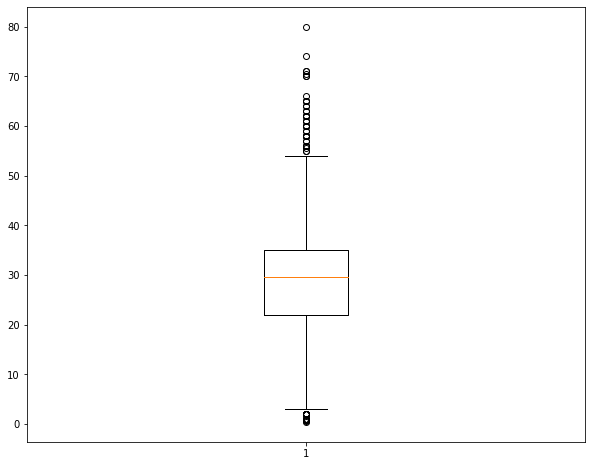

In [51]:
plt.figure(figsize=(10,8))
plt.boxplot(data.Age)
plt.show()

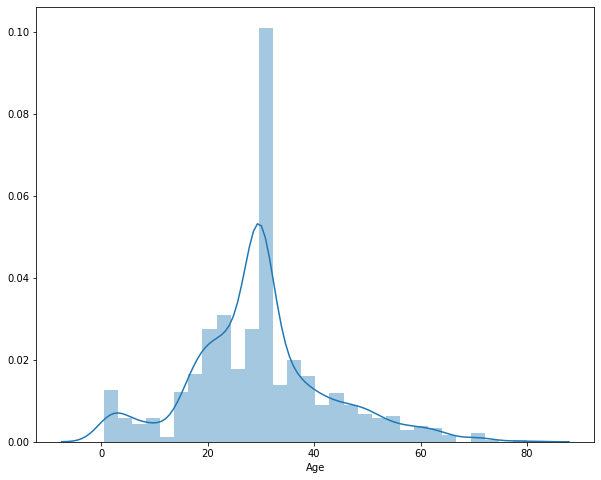

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age)
plt.show()

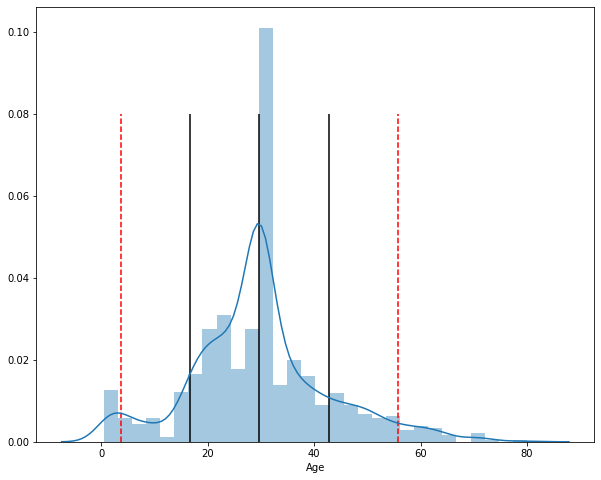

In [57]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age)
plt.vlines(data.Age.mean(), 0, 0.08)
plt.vlines(data.Age.mean()+data.Age.std(), 0, 0.08)
plt.vlines(data.Age.mean()-data.Age.std(), 0, 0.08)

plt.vlines(data.Age.mean()+2*data.Age.std(), 0, 0.08, linestyle='--', colors='r')
plt.vlines(data.Age.mean()-2*data.Age.std(), 0, 0.08, linestyle='--', colors='r')

In [58]:
from scipy.stats import norm

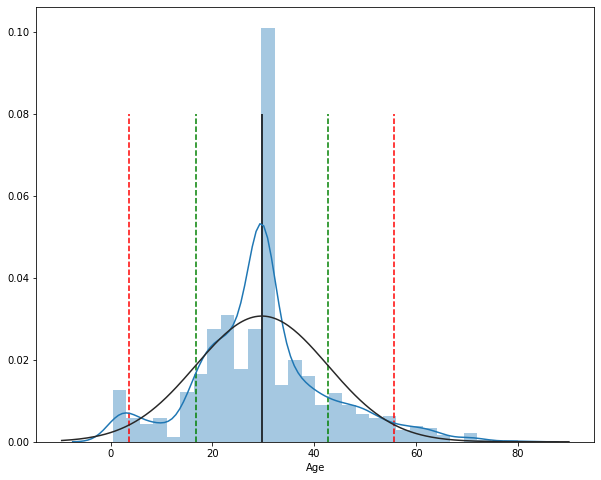

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age, fit=norm)

plt.vlines(data.Age.mean(), 0, 0.08)
plt.vlines(data.Age.mean()+data.Age.std(), 0, 0.08, linestyle='--', colors='g')
plt.vlines(data.Age.mean()-data.Age.std(), 0, 0.08, linestyle='--', colors='g')

plt.vlines(data.Age.mean()+2*data.Age.std(), 0, 0.08, linestyle='--', colors='r')
plt.vlines(data.Age.mean()-2*data.Age.std(), 0, 0.08, linestyle='--', colors='r')

In [90]:
q25, q75 = np.percentile(data.Age, 25), np.percentile(data.Age, 75)
iqr = q75-q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

print('Inter Quartile Range',iqr)
print('Cut_off', cut_off)
print(f'upper limit {upper}, lower limit {lower}')

Inter Quartile Range 13.0
Cut_off 19.5
upper limit 54.5, lower limit 2.5


In [91]:
outliers = [x for x in data.Age if x < lower or x > upper]
print('outliers: {}'.format(outliers))

outliers: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


### Removing outliers

In [77]:
new_df = data.drop(data[(data['Age'] > upper) | (data['Age'] < lower)].index)

In [89]:
len(data), len(new_df)

(891, 825)

In [92]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [93]:
X = data.drop('Survived', 1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7835820895522388

### Prediction

In [80]:
model.predict([[891, 3, 1, 32, 0, 0, 7.75, 2.0]])

array([0])

In [78]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,1,27.0,0,0,13.00,0.0
887,888,1,1,0,19.0,0,0,30.00,0.0
888,889,0,3,0,28.0,1,2,23.45,0.0
889,890,1,1,1,26.0,0,0,30.00,1.0
890,891,0,3,1,32.0,0,0,7.75,2.0
